(562, 207)
(207,)
X training shape:(393, 10)
Notice that we reduced the number of features from 207 to 10
precision score= 0.7291666666666666
##########
(562, 69)
(69,)
X training shape:(393, 10)
Notice that we reduced the number of features from 69 to 10
precision score= 0.7070707070707071
##########
(562, 41)
(41,)
X training shape:(393, 10)
Notice that we reduced the number of features from 41 to 10
precision score= 0.6831683168316832
##########
(562, 20)
(20,)
X training shape:(393, 10)
Notice that we reduced the number of features from 20 to 10
precision score= 0.6979166666666666
##########
Now let us compare the Precision scores


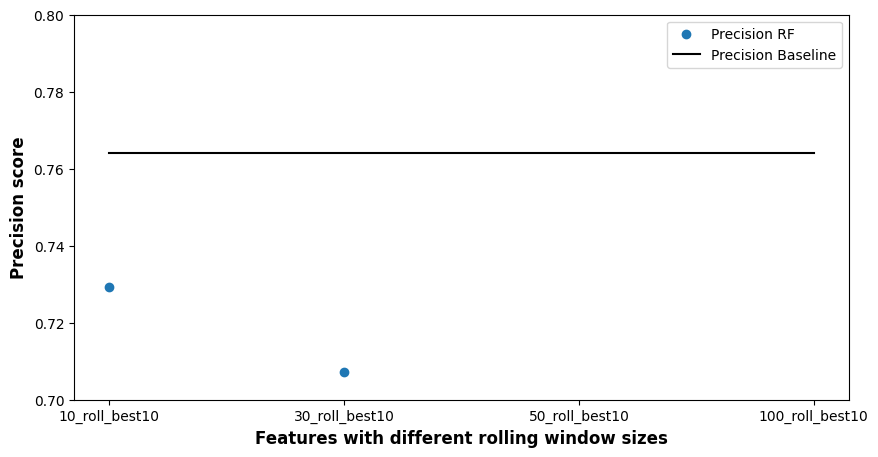

In [1]:
# Granny Smith 4

%store -r Y
%store -r X_arrayRol 
%store -r selected_indexes 

Y = Y.map({'S': 1, 'B': 0})
Y

import sys
sys.path.append("..")
####
from sklearn.ensemble import RandomForestClassifier # a ML method
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
from source.utils import split #  a pre-defined function to split the data into training and testing|


acc_list = [] # a list to save the accuracy score for the 4 different datasets we have
prec_list = [] # a list to save the precision score for the 4 different datasets we have
for x_roll,boolInd in zip (X_arrayRol, selected_indexes):
    print(x_roll.shape)
    print(boolInd.shape) # a boolean array to select the best 10 features
    Xtrain, Xtest, Ytrain, Ytest  = split( x_roll.values[:,boolInd], Y )
    print("X training shape:" + str(Xtrain.shape))
    print("Notice that we reduced the number of features from " + str(x_roll.shape[1]) + " to " + str(Xtrain.shape[1]))
    RF = RandomForestClassifier(random_state=0, n_estimators=500) #defining the model
    RF.fit(Xtrain, Ytrain) # training the machine learning model
    y_pred = RF.predict(Xtest)
    
#### Calculating the scores
    prec = precision_score(Ytest.values, y_pred)
    print("precision score= "+str(prec))

#### appending the score to a list
    prec_list.append(prec) # append the precision score to a list.
    
#### Done
    print('##########')
    
    
    
import matplotlib.pyplot as plt

print("Now let us compare the Precision scores")
plt.figure(figsize=(10, 5))

mystring = "roll_"
    
# We make the second curve dashed so that it doesn't cover up the first
plt.scatter([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], prec_list, label = "Precision RF")
plt.plot([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], [0.764]*len(prec_list), label = "Precision Baseline", color = "black")



# plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Features with different rolling window sizes", fontweight ='bold', fontsize =12)
plt.ylabel("Precision score", fontweight ='bold', fontsize =12)
plt.ylim([.7,.8])

plt.legend()

plt.show()